In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


First a Pandas dataframe is made

In [2]:
data = pd.read_csv("Datasets/HR_diagram.csv")
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type,Star_color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


We are showing the density of the datapoints in any columns

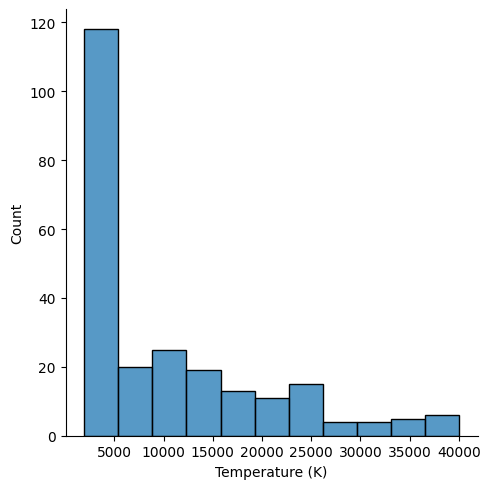

In [3]:
sns.displot(data["Temperature (K)"])

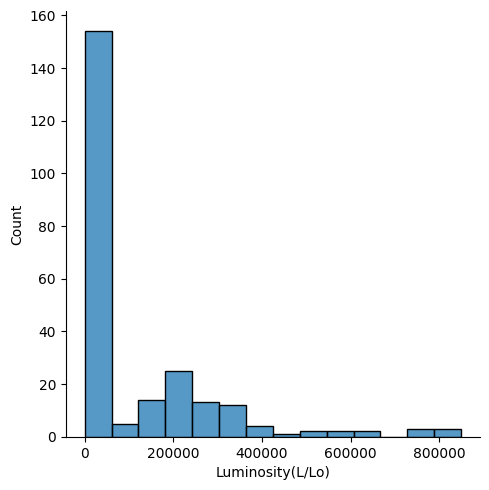

In [4]:
sns.displot(data["Luminosity(L/Lo)"])

Convert columns to (numpy) array

In [5]:
starColor = data["Star_color"].to_numpy()
print(starColor[239])

Blue


Dropping the unnessesary columns

In [6]:
x = data.drop(['Spectral_Class',"Star_type","Star_color"],axis="columns")
z = data.Star_type

Making a function ---StarColor-- that takes the strings contained by the --starColor-- array and gives the output as a color code for the color attribute of the scatterplot 

In [7]:
def StarColor(color):
    if color == 'Blue' :
        return 'blue'
    elif color == 'Blue-white':
        return 'white'
    elif color == 'Whitish':
        return 'green'
    elif color == 'White':
        return 'pink'
    elif color == 'White-Yellow':
        return 'gray'
    elif color == 'Yellowish White':
        return 'black'
    elif color == 'yellow-white':
        return 'yellow'
    elif color == 'yellowish':
        return 'violet'
    elif color == 'Pale yellow orange':
        return 'cyan'
    elif color == 'Orange-Red':
        return 'orange'
    elif color == 'Red':
        return 'red'
    else:
        return '#ed5045'
   

# Making a Scatter plot

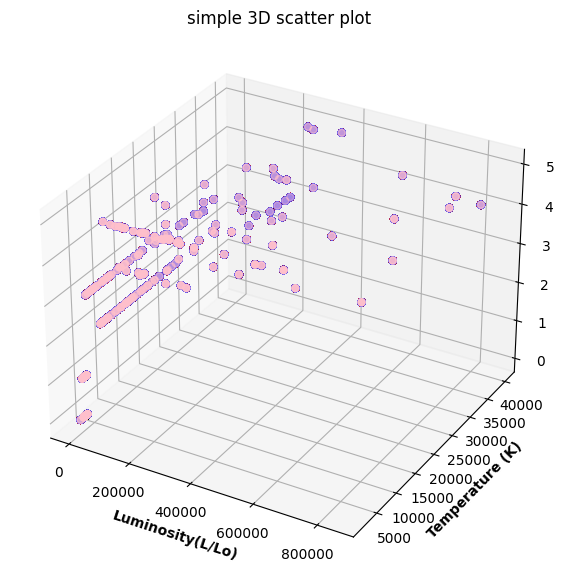

In [8]:

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
i=0
for i in range (0,239) :
    ax.scatter3D(x["Luminosity(L/Lo)"],x["Temperature (K)"], z, c = StarColor(starColor[i]),marker='.',s=100) #StarColor(starColor[i]))
    
plt.title("simple 3D scatter plot")
ax.set_xlabel('Luminosity(L/Lo)', fontweight ='bold')
ax.set_ylabel('Temperature (K)', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
 
# show plot
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

Spliting the dataset to (80 :20 ratio) training dataset and testing dataset

In [10]:
x_train,x_test,z_train,z_test = train_test_split(x,z,test_size=0.2,random_state=1)

# Applying Logistic Regression model 

In [11]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver="newton-cg")

In [12]:
lr_model.fit(x_train,z_train)

c:\Users\SAGNIK KAYAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='newton-cg')

Model Accuracy :

In [13]:
lr_model.score(x_test,z_test)

0.9791666666666666

Showing confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix
z_pred = lr_model.predict(x_test)
cm = confusion_matrix(z_test,z_pred)   
cm

array([[ 6,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0],
       [ 0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  1,  9]], dtype=int64)

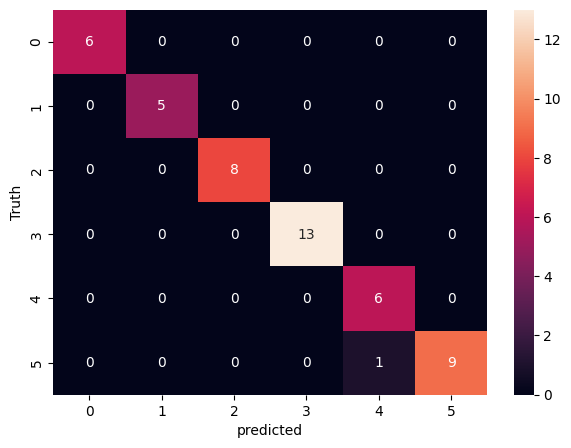

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
def confusion_matrix():
    plt.figure(figsize=(7,5))
    sn.heatmap(cm, annot=True)
    plt.xlabel('predicted')
    plt.ylabel('Truth')

confusion_matrix()

# Classification Report

In [17]:
from sklearn.metrics import classification_report

print(classification_report(z_test,z_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        13
           4       0.86      1.00      0.92         6
           5       1.00      0.90      0.95        10

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48

